## Vehicle Detection

In [1]:
# Import Modules
import cv2
import requests
import numpy as np

from PIL import Image


#### Get Images

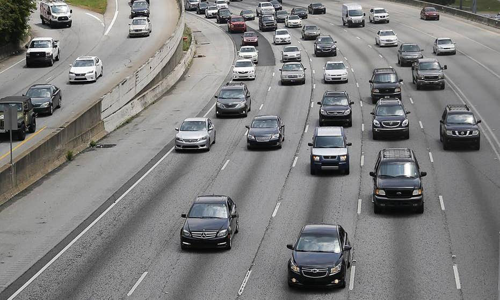

In [3]:
# Reading Image for Cars
car_img = Image.open(requests.get(
    'https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
car_img.save('sample_images/Cars.jpg')
car_img.resize((500, 300))


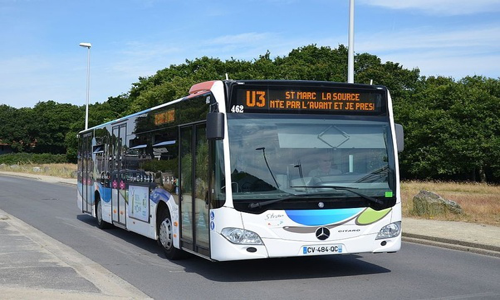

In [11]:
# Reading Image for Bus
bus_img = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
bus_img.resize((500, 300))


## Processing Images

Steps to detect vehicles:
- Convert image to grayscale.
- Apply Gaussian Blur to remove noise.
- Dialate the image (Opposite of Erosion). Pixel is 1 if atleast one pixel under the kernel is 1. It increases the white region of image.
- Apply circular morphology transformation to close holes in foreground objects
- Detect vehicles in the image using haar cascades

In [12]:
def DetectVehicles(img, cascade):
    # Preprocessing the Image
    img_processed = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_processed = cv2.GaussianBlur(img_processed, (5, 5), 0)
    img_processed = cv2.dilate(img_processed, np.ones((3, 3)))

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    img_processed = cv2.morphologyEx(img_processed, cv2.MORPH_CLOSE, kernel)

    # Detecting Vehicles with Cascade
    vehicles = cascade.detectMultiScale(img_processed, 1.1, 1)

    # Drawing Rectangles in original image
    for (x, y, w, h) in vehicles:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Return result along with number of vehicles
    return img, len(vehicles)


35 Cars Detected


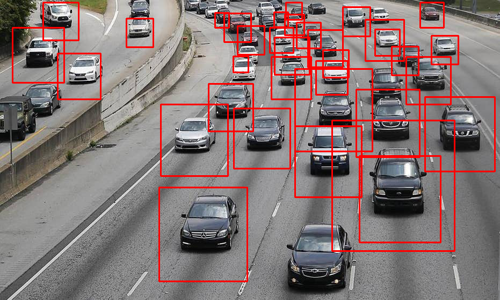

In [13]:
# Detect Cars in car_img
car_img = np.array(car_img)
car_img, count = DetectVehicles(car_img, cv2.CascadeClassifier('cascades/cars.xml'))

print(f'{count} Cars Detected')

car_img = Image.fromarray(car_img)
car_img.resize((500, 300))


1 Buses Detected


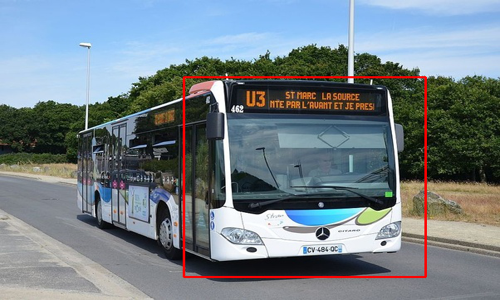

In [14]:
# Detect Bus in bus_img
bus_img = np.array(bus_img)
bus_img, count = DetectVehicles(bus_img, cv2.CascadeClassifier('cascades/Bus_front.xml'))

print(f'{count} Buses Detected')

bus_img = Image.fromarray(bus_img)
bus_img.resize((500, 300))


#### Vehicle Detection in Video

In [15]:
# Setting video capture and writer
vdo_capture = cv2.VideoCapture('videos/Cars.mp4')
vdo_writer = cv2.VideoWriter('videos/Cars_detected.avi', cv2.VideoWriter_fourcc(*'DIVX'), 25, (640, 360))


In [16]:
# Looping through video
cascade = cv2.CascadeClassifier('cascades/cars.xml')

while True:
    _, frame = vdo_capture.read()

    if frame is None:
        break

    frame, _ = DetectVehicles(frame, cascade)
    vdo_writer.write(frame)

vdo_capture.release()
vdo_writer.release()
cv2.destroyAllWindows()
